# Đánh giá hiệu suất của các mô hình

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

### Bước 1: Đọc và Chuẩn bị Dữ liệu
Mô tả: Đọc dữ liệu huấn luyện (X_train_smote, y_train_smote) và kiểm tra (X_test, y_test) từ các file CSV. Chuyển nhãn (y) thành dạng Series để phù hợp với các mô hình.

In [51]:
# Đọc dữ liệu huấn luyện và kiểm tra
X_train_smote = pd.read_csv('Dataset/dataset_combined/UNSW_NB15_X_train_smote.csv')
y_train_smote = pd.read_csv('Dataset/dataset_combined/UNSW_NB15_y_train_smote.csv')
X_test = pd.read_csv('Dataset/dataset_combined/UNSW_NB15_X_test.csv')
y_test = pd.read_csv('Dataset/dataset_combined/UNSW_NB15y_test.csv')

# Chuyển y_train_smote và y_test thành Series
y_train_smote = y_train_smote.iloc[:, 0]
y_test = y_test.iloc[:, 0]

### Bước 2: Định nghĩa Các Mô hình Phân lớp
Mô tả: Khởi tạo danh sách 6 mô hình phân lớp khác nhau: Logistic Regression, Decision Tree, Random Forest, KNN, Gradient Boosting, và Naive Bayes. Các tham số cơ bản được thiết lập với random_state=42 để đảm bảo kết quả có thể tái lập.

In [54]:
# Danh sách các mô hình
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB()
}

# Hiển thị danh sách mô hình (tùy chọn)
print("Các mô hình được sử dụng:")
for model_name in models.keys():
    print(f"- {model_name}")

Các mô hình được sử dụng:
- Logistic Regression
- Decision Tree
- Random Forest
- KNN
- Gradient Boosting
- Naive Bayes


### Bước 3: Huấn luyện và Dự đoán
Mô tả: Huấn luyện từng mô hình trên tập huấn luyện (X_train_smote, y_train_smote) và dự đoán trên tập kiểm tra (X_test). Lưu kết quả dự đoán vào từ điển predictions để sử dụng ở các bước sau.

In [57]:
# Lưu dự đoán
predictions = {}

# Huấn luyện và dự đoán từng mô hình
for model_name, model in models.items():
    print(f"Huấn luyện mô hình: {model_name}")
    
    # Huấn luyện mô hình
    model.fit(X_train_smote, y_train_smote)
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred

print("Đã hoàn tất huấn luyện và dự đoán cho tất cả mô hình.")

Huấn luyện mô hình: Logistic Regression
Huấn luyện mô hình: Decision Tree
Huấn luyện mô hình: Random Forest
Huấn luyện mô hình: KNN
Huấn luyện mô hình: Gradient Boosting
Huấn luyện mô hình: Naive Bayes
Đã hoàn tất huấn luyện và dự đoán cho tất cả mô hình.


### Bước 4: Đánh giá Hiệu suất của Các Mô hình
Mô tả: Đánh giá từng mô hình bằng các chỉ số hiệu suất (Accuracy, Precision, Recall, F1-Score) và lưu ma trận nhầm lẫn. Báo cáo phân loại và ma trận nhầm lẫn được in ra để kiểm tra.

In [72]:
# Lưu ma trận nhầm lẫn và chỉ số hiệu suất
confusion_matrices = {}
performance_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

# Đánh giá từng mô hình
for model_name, y_pred in predictions.items():
    print(f"\n=== Đánh giá mô hình: {model_name} ===")
    
    # Báo cáo phân loại
    report = classification_report(y_test, y_pred, output_dict=True)
    print("Báo cáo phân loại:")
    print(classification_report(y_test, y_pred))
    
    # Lưu các chỉ số hiệu suất (weighted avg)
    performance_metrics['Model'].append(model_name)
    performance_metrics['Accuracy'].append(report['accuracy'])
    performance_metrics['Precision'].append(report['weighted avg']['precision'])
    performance_metrics['Recall'].append(report['weighted avg']['recall'])
    performance_metrics['F1-Score'].append(report['weighted avg']['f1-score'])
    
    # Tính và lưu ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm

# Hiển thị bảng tổng hợp hiệu suất
performance_df = pd.DataFrame(performance_metrics)
print("\nBảng tổng hợp hiệu suất:")
print(performance_df)


=== Đánh giá mô hình: Logistic Regression ===
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     18600
           1       0.93      0.91      0.92     32935

    accuracy                           0.90     51535
   macro avg       0.88      0.89      0.89     51535
weighted avg       0.90      0.90      0.90     51535


=== Đánh giá mô hình: Decision Tree ===
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     18600
           1       0.95      0.95      0.95     32935

    accuracy                           0.94     51535
   macro avg       0.93      0.93      0.93     51535
weighted avg       0.94      0.94      0.94     51535


=== Đánh giá mô hình: Random Forest ===
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     18600
           1       0.97      0.96      0.96     329

### Bước 5: Vẽ Ma trận Nhầm lẫn
Mô tả: Sử dụng Seaborn để vẽ ma trận nhầm lẫn của từng mô hình dưới dạng lưới 2x3 (6 ô, phù hợp với 6 mô hình).

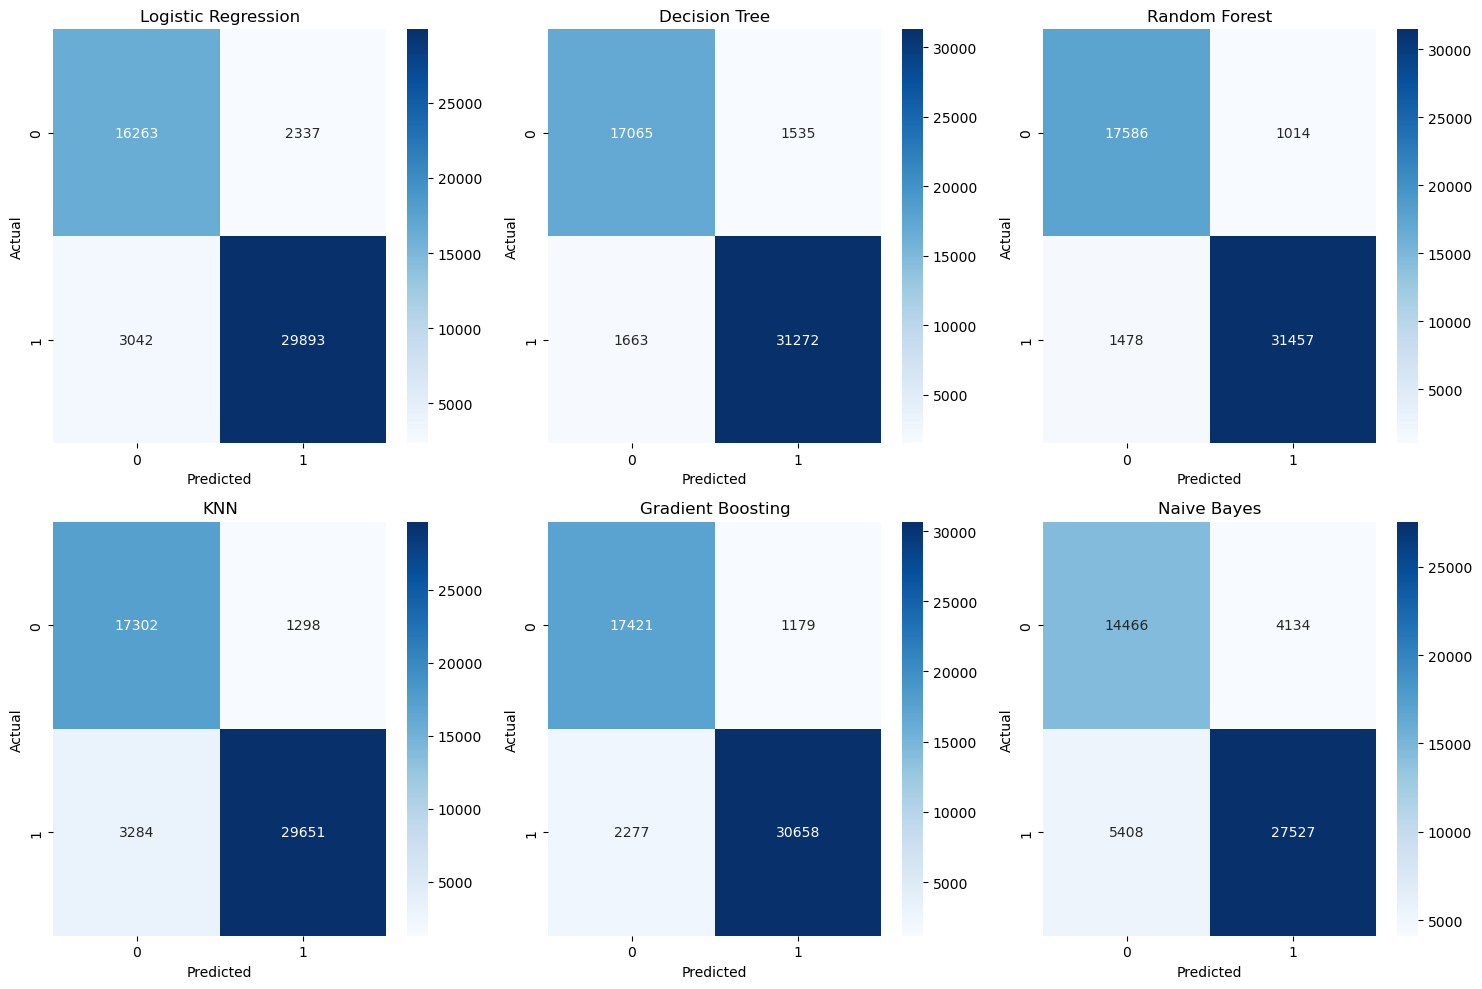

Đã lưu chỉ số hiệu suất để sử dụng cho bước tiếp theo.


In [75]:
# Vẽ ma trận nhầm lẫn dạng lưới 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (model_name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Lưu performance_metrics vào biến toàn cục để sử dụng ở ô tiếp theo
global_performance_metrics = performance_metrics
print("Đã lưu chỉ số hiệu suất để sử dụng cho bước tiếp theo.")

### Bước 6: Vẽ Biểu đồ So sánh Hiệu suất của Các Mô hình
Mô tả: Sử dụng Matplotlib để vẽ biểu đồ cột so sánh hiệu suất của các mô hình dựa trên các chỉ số Accuracy, Precision, Recall và F1-Score. Biểu đồ sẽ hiển thị từng mô hình với 4 cột tương ứng với 4 chỉ số, sử dụng màu sắc khác nhau để phân biệt.

Dữ liệu hiệu suất:
                     Accuracy  Precision    Recall  F1-Score
Model                                                       
Logistic Regression  0.895624   0.896788  0.895624  0.896030
Decision Tree        0.937945   0.938049  0.937945  0.937991
Random Forest        0.951645   0.952061  0.951645  0.951771
KNN                  0.911090   0.915621  0.911090  0.911961
Gradient Boosting    0.932939   0.934613  0.932939  0.933332
Naive Bayes          0.814844   0.818343  0.814844  0.816084


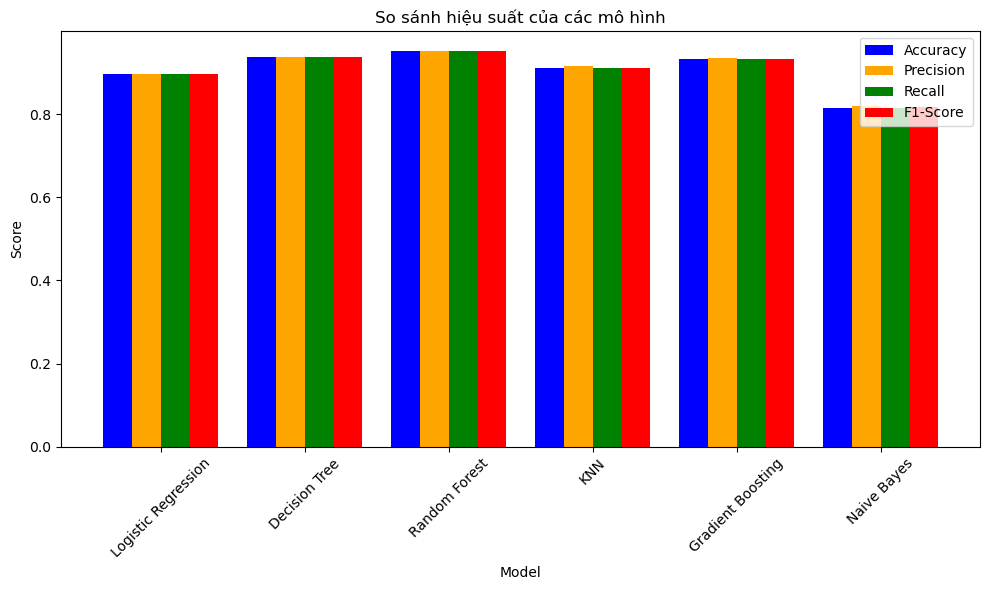

In [78]:
# Lấy dữ liệu hiệu suất từ biến toàn cục
performance_metrics = global_performance_metrics

# Chuyển thành DataFrame
performance_df = pd.DataFrame(performance_metrics)

# Đặt cột 'Model' làm chỉ số để dễ vẽ biểu đồ
performance_df.set_index('Model', inplace=True)

# Hiển thị DataFrame để kiểm tra
print("Dữ liệu hiệu suất:")
print(performance_df)

import matplotlib.pyplot as plt
import numpy as np

# Thiết lập tham số cho biểu đồ
models = performance_df.index
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(models))  # Vị trí của các nhóm cột
width = 0.2  # Độ rộng của mỗi cột

# Tạo biểu đồ cột
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ cột cho từng chỉ số
ax.bar(x - 1.5*width, performance_df['Accuracy'], width, label='Accuracy', color='blue')
ax.bar(x - 0.5*width, performance_df['Precision'], width, label='Precision', color='orange')
ax.bar(x + 0.5*width, performance_df['Recall'], width, label='Recall', color='green')
ax.bar(x + 1.5*width, performance_df['F1-Score'], width, label='F1-Score', color='red')

# Thiết lập tiêu đề và nhãn
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('So sánh hiệu suất của các mô hình')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Điều chỉnh bố cục để không bị cắt
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()